# KNN Exercise

![iris](images/iris.jpg)

We are going to use the famous **iris data set** again. 

The dataset consists of four attributes, which can be used to distinguish different iris species: 
* sepal-width
* sepal-length
* petal-width 
* petal-length. 


The task is to predict the class to which these plants belong. There are three classes in the dataset: **Iris-setosa, Iris-versicolor and Iris-virginica.** 

Further details of the dataset are available here.
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

## Task

1. Please import and pre-process the data (as far as it's necessary). Afterwards split it in a train and test set, fit a KNN model and make predictions on the test set. The last step is to evaluate your model. Try to also scale your data and fit the model to the unscaled and scaled data. Can you see a difference in performance? 
If you can't it's because the original features are all on a very similar scale. Try multiplying one of the features by a factor of 10 and fitting the model to unscaled and scaled data. The difference should now be obvious 

2. Please also calculate the accuracy for K values of 1 to 40. In each iteration the accuracy for the predicted values of the test set is calculated and the result is appended to an error list.
The next step is to plot the accuracy values against K values.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier




In [2]:
# loading the data
df = pd.read_csv("data/iris.csv")
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [3]:
x = df.drop(columns=['species'])
y = df.species

y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=15)


In [5]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, np.ravel(y_train))

KNeighborsClassifier(metric='euclidean')

Accuracy: 0.97
Recall (macro): 0.98
--------------------------------------------------


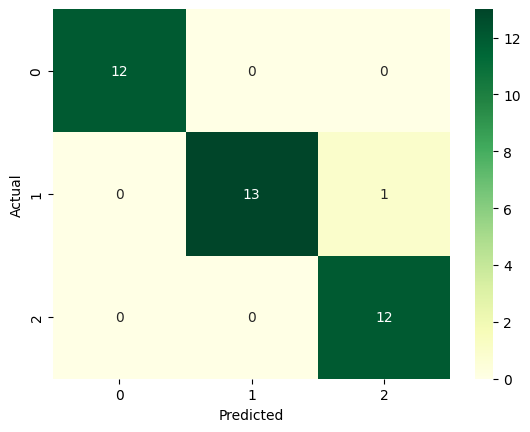

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score

y_pred = knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro").round(2))
print("-----" * 10)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))


### 1. scaling the data

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scale train and test correctly
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# fit KNN on scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_scaled.fit(x_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(x_test_scaled)

print("Scaled Accuracy:", accuracy_score(y_test, y_pred_scaled).round(2))
print("Scaled Recall (macro):", recall_score(y_test, y_pred_scaled, average="macro").round(2))


Scaled Accuracy: 0.97
Scaled Recall (macro): 0.98


#### Multiply ONE feature by 10 to see the scale effect on the model

In [11]:

# No difference in the metrics between scaled and unscaled data
#Making the scaling effect obvious

x_modified = x.copy()
x_modified["sepal_length"] = x_modified["sepal_length"] * 10

Accuracy: 0.89
Recall (macro): 0.9
--------------------------------------------------


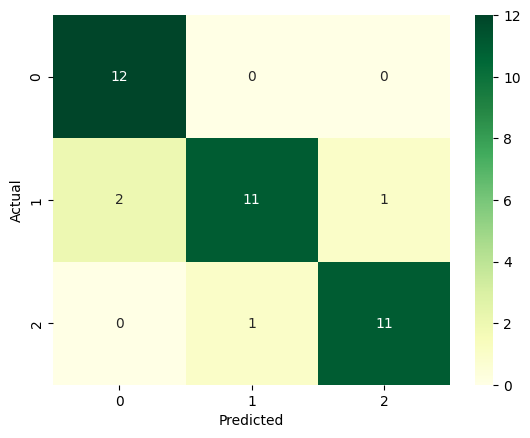

                 precision    recall  f1-score   support

    Iris-setosa       0.86      1.00      0.92        12
Iris-versicolor       0.92      0.79      0.85        14
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.89        38
      macro avg       0.90      0.90      0.90        38
   weighted avg       0.90      0.89      0.89        38



In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_modified, y, random_state=15)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, np.ravel(y_train))

y_pred = knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro").round(2))
print("-----" * 10)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))


So - Scaling does not significantly change model performance on the original Iris dataset because all features are on a similar scale. However, after artificially changing the scale of one feature, the performance of the unscaled KNN model deteriorates, while scaling restores performance. This demonstrates the importance of feature scaling for distance-based algorithms such as KNN.

### 2. K values 1 to 40

In [ ]:
from sklearn.metrics import accuracy_score

k_values = range(1, 41)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)



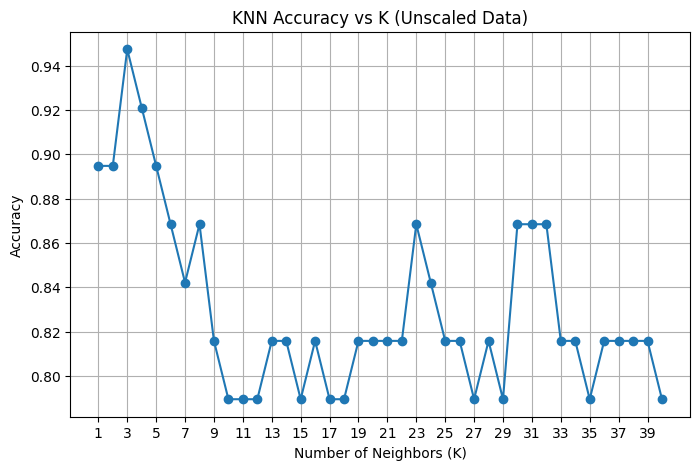

In [14]:
# k_values → x-axis
# accuracies → y-axis

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K (Unscaled Data)")
plt.xticks(range(1, 41, 2))
plt.grid(True)
plt.show()


#### K values 1 to 40 on a scaled dataset

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

accuracies_scaled = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train_scaled, y_train)
    y_pred = knn.predict(x_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies_scaled.append(acc)


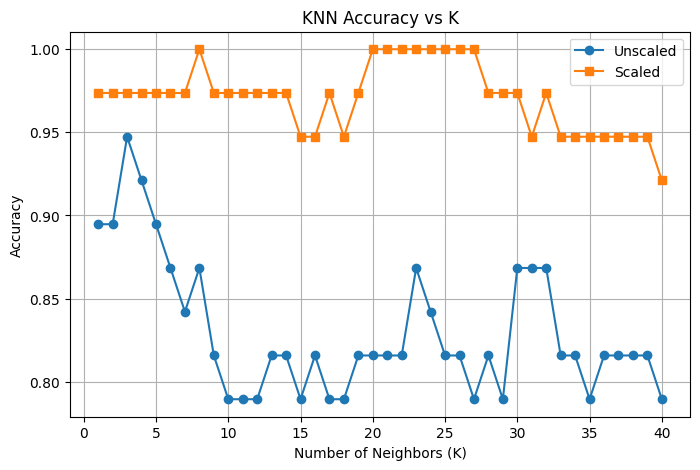

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', label="Unscaled")
plt.plot(k_values, accuracies_scaled, marker='s', label="Scaled")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.legend()
plt.grid(True)
plt.show()


So - When one feature is artificially scaled up, the performance of the unscaled KNN model deteriorates significantly, while the scaled KNN model remains stable across different K values. This highlights the importance of feature scaling for distance-based algorithms such as KNN.